# Regresión lineal simple en Python
<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>

Aquí se muestra un ejemplo de como usar Python para ajustar un modelo de regresión lineal simple. 

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

## Ingresando los datos

Los datos **softdrink** corresponden al tiempo $Y$ que un empleado demora para revisar y surtir una máquina dispensadora en función de la cantidad de cajas $X_1$ que surte a la máquina y de la distancia $X_2$ entre la máquina dispensadora y el camión repartidor. Como este es un ejemplo de regresión lineal simple se utilizará solo la covariable $X_1$ para explicar la respuesta $Y$.

Abajo una figura ilustrativa de la situación.

![Figura ilustrativa](maquina_dispensadora.png)

Para leer los datos usaremos la función `read_csv` de pandas.

In [2]:
file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20simple/softdrink.csv'
dt = pd.read_csv(file)

Para mostrar la parte inicial de los datos usamos `head()`

In [3]:
dt.head()

,Obs,y,x1,x2
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


## Diagrama de dispersión

Para crear el diagrama de dispersión usamos la función `plot`.

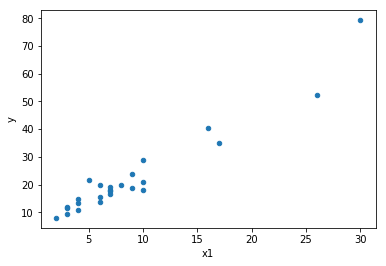

In [4]:
dt.plot(kind='scatter', x='x1', y='y');

## 1. Creando el modelo de regresión usando `statsmodels.api`

In [5]:
X = dt["x1"]            ## X usually means our input variables (or independent variables)
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
y = dt["y"]             ## Y usually means our output/dependent variable

# To fit the model
mod1 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = mod1.predict(X)

Para obtener un resumen del modelo ajustado usamos el siguiente código.

In [6]:
# Print out the statistics
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Thu, 30 May 2019   Prob (F-statistic):           8.22e-15
Time:                        14:21:10   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3208      1.371      2.422      0.024       0.484       6.157
x1             2.1762      0.124     17.546      0.000       1.920       2.433
==============================================================================
Omnibus:                        2.383   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.037
Skew:                           0.388   Prob(JB):                        0.595
Kurtosis:                       3.627   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Ajustando el modelo por medio de fórmulas con `statsmodels.formula.api`

In [7]:
# Fit regression model (using the natural log of one of the regressors)
mod2 = smf.ols('y ~ x1', data=dt).fit()

Para obtener un resumen del modelo ajustado usamos el siguiente código.

In [8]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Thu, 30 May 2019   Prob (F-statistic):           8.22e-15
Time:                        14:21:10   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3208      1.371      2.422      0.0

## 3. ¿Cómo agregar la recta de regresión estimada?

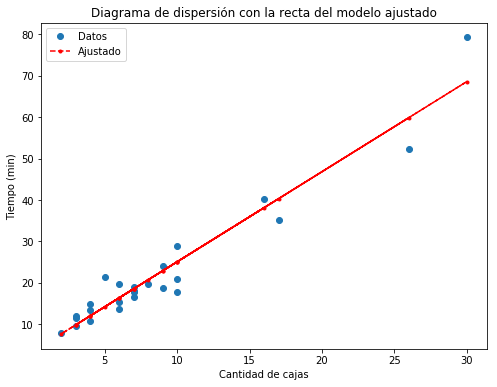

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dt["x1"] , dt["y"] , 'o', label="Datos")
ax.plot(dt["x1"], mod2.fittedvalues, 'r--.', label="Ajustado")
legend = ax.legend(loc="best")
plt.xlabel('Cantidad de cajas')
plt.ylabel('Tiempo (min)')
plt.title('Diagrama de dispersión con la recta del modelo ajustado');

Se le recomienda al lector visitar [esta página](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) para ver más ejemplos.

<div class="alert alert-info">
  <strong>Tarea</strong> <br>
    - Replicar este ejemplo con R y comparar. <br>
    - Hacer otros ejercicios con Python.
</div>